In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_yout = pd.read_csv("./data/clean.csv")

In [4]:
print(df_yout.shape)
print(df_yout.nunique())

(5121, 16)
Unnamed: 0           5121
video_id             5121
title                5120
published_at         5039
channel_id           2817
channel_title        2818
category_id            15
trending_date          40
view_count           5112
likes                4795
comment_count        2973
comments_disabled       2
description          4887
notes                  11
age                   320
temperature          4503
dtype: int64


In [5]:
# Checking for Nulls again and type of our data
df_yout.info()
print(df_yout.where(df_yout['category_id'] == 29).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5121 non-null   int64  
 1   video_id           5121 non-null   object 
 2   title              5121 non-null   object 
 3   published_at       5121 non-null   object 
 4   channel_id         5121 non-null   object 
 5   channel_title      5121 non-null   object 
 6   category_id        5121 non-null   int64  
 7   trending_date      5121 non-null   object 
 8   view_count         5121 non-null   int64  
 9   likes              5121 non-null   int64  
 10  comment_count      5121 non-null   int64  
 11  comments_disabled  5121 non-null   bool   
 12  description        5121 non-null   object 
 13  notes              5121 non-null   int64  
 14  age                5121 non-null   int64  
 15  temperature        5121 non-null   float64
dtypes: bool(1), float64(1), 

# Let's start looking if Views, likes, and comment counts have a Gaussian Distribution


In [6]:
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['view_count'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)
df_yout['temperature_log'] = np.log(df_yout['temperature'] + 1)

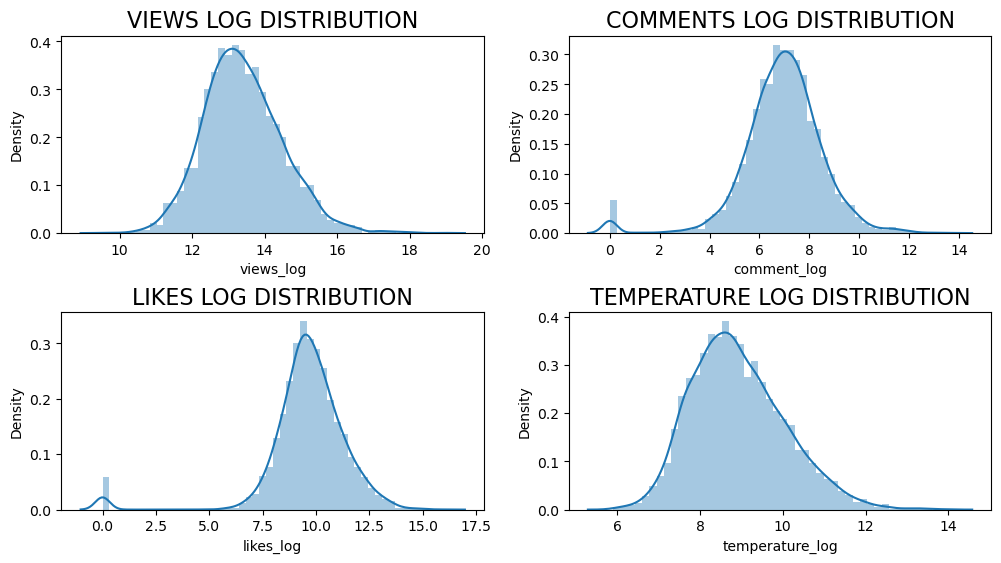

In [17]:
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUTION", fontsize=16)

plt.subplot(223)
g2 = sns.distplot(df_yout['likes_log'])
g2.set_title('LIKES LOG DISTRIBUTION', fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUTION", fontsize=16)

plt.subplot(224)
g3 = sns.distplot(df_yout['temperature_log'])
g3.set_title("TEMPERATURE LOG DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()


# Let's extract the hour value of datetime

In [13]:
hour = []
for date in df_yout['published_at']:
  tempHour = (date.split("T")[1].split(":"))[0]
  hour.append(tempHour)
df_yout['publishing_hour'] = hour
df_yout['publishing_hour'] = df_yout['publishing_hour'].astype(int)
print(df_yout['publishing_hour'].value_counts()[:5])

9     513
10    411
11    378
12    271
15    269
Name: publishing_hour, dtype: int64


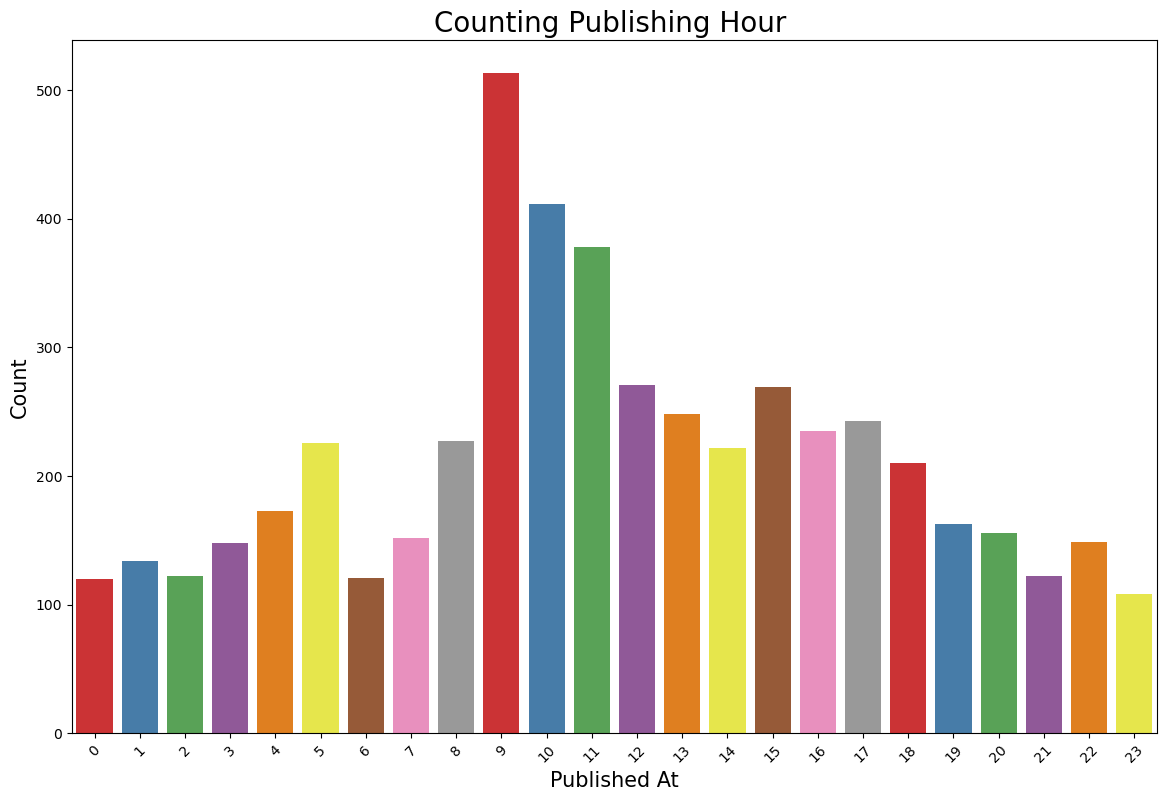

In [14]:
plt.figure(figsize = (14,9))

g = sns.countplot('publishing_hour', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Publishing Hour ", fontsize=20)
g.set_xlabel("Published At", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

In [10]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film & Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Autos & Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets & Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sports'
df_yout.loc[(df_yout["category_id"] == 18),"category_name"] = 'Short Movies'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 21),"category_name"] = 'Videoblogging'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'Howto & Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science & Technology'
df_yout.loc[(df_yout["category_id"] == 30),"category_name"] = 'Movies'
df_yout.loc[(df_yout["category_id"] == 31),"category_name"] = 'Anime/Animation'
df_yout.loc[(df_yout["category_id"] == 32),"category_name"] = 'Action/Adventure'
df_yout.loc[(df_yout["category_id"] == 33),"category_name"] = 'Classics'
df_yout.loc[(df_yout["category_id"] == 34),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 35),"category_name"] = 'Documentary'
df_yout.loc[(df_yout["category_id"] == 36),"category_name"] = 'Drama'
df_yout.loc[(df_yout["category_id"] == 37),"category_name"] = 'Family'
df_yout.loc[(df_yout["category_id"] == 38),"category_name"] = 'Foreign'
df_yout.loc[(df_yout["category_id"] == 39),"category_name"] = 'Horror'
df_yout.loc[(df_yout["category_id"] == 40),"category_name"] = 'Sci-Fi/Fantasy'
df_yout.loc[(df_yout["category_id"] == 41),"category_name"] = 'Thriller'
df_yout.loc[(df_yout["category_id"] == 42),"category_name"] = 'Shorts'
df_yout.loc[(df_yout["category_id"] == 43),"category_name"] = 'Shows'
df_yout.loc[(df_yout["category_id"] == 44),"category_name"] = 'Trailers'


Category Name count
Entertainment       1569
Gaming               642
People and Blogs     642
Music                585
Sports               555
Name: category_name, dtype: int64


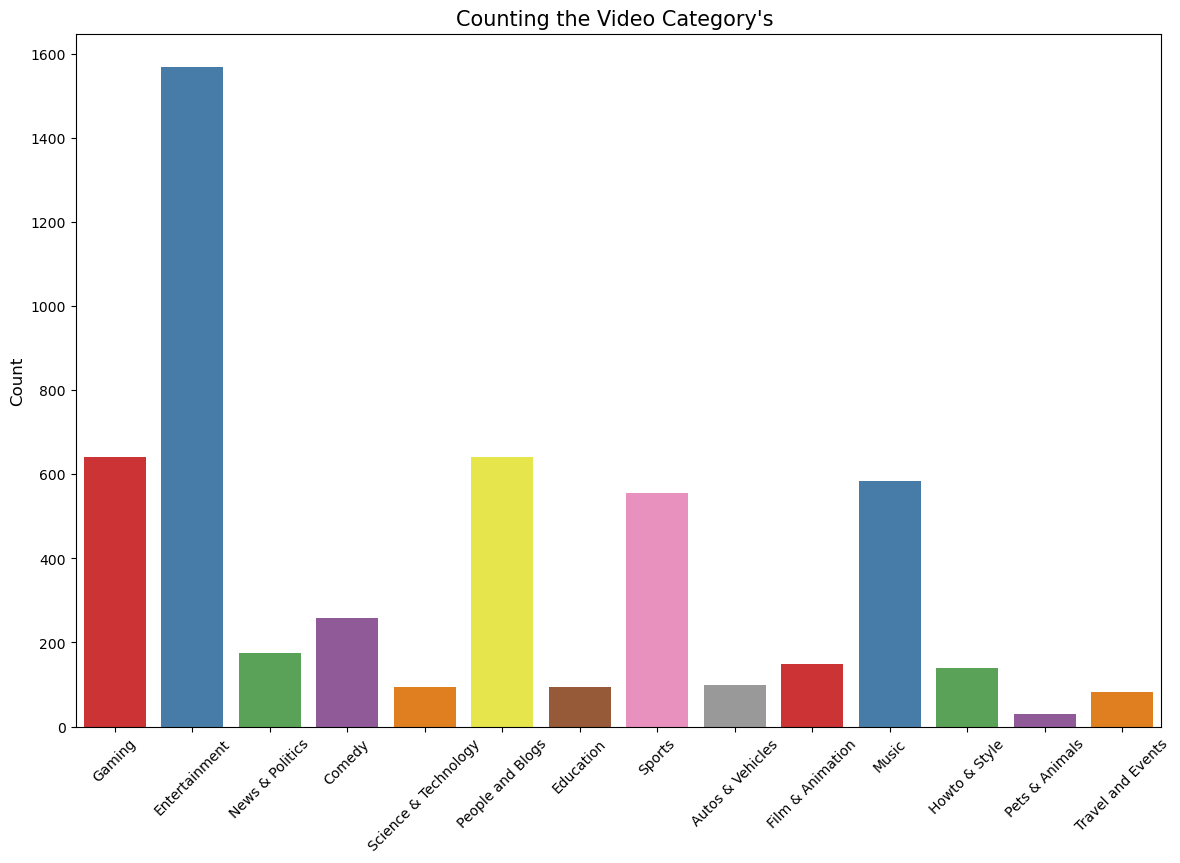

In [19]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))
g = sns.countplot('category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

#Looking the Views, likes, distribution by category_name's 

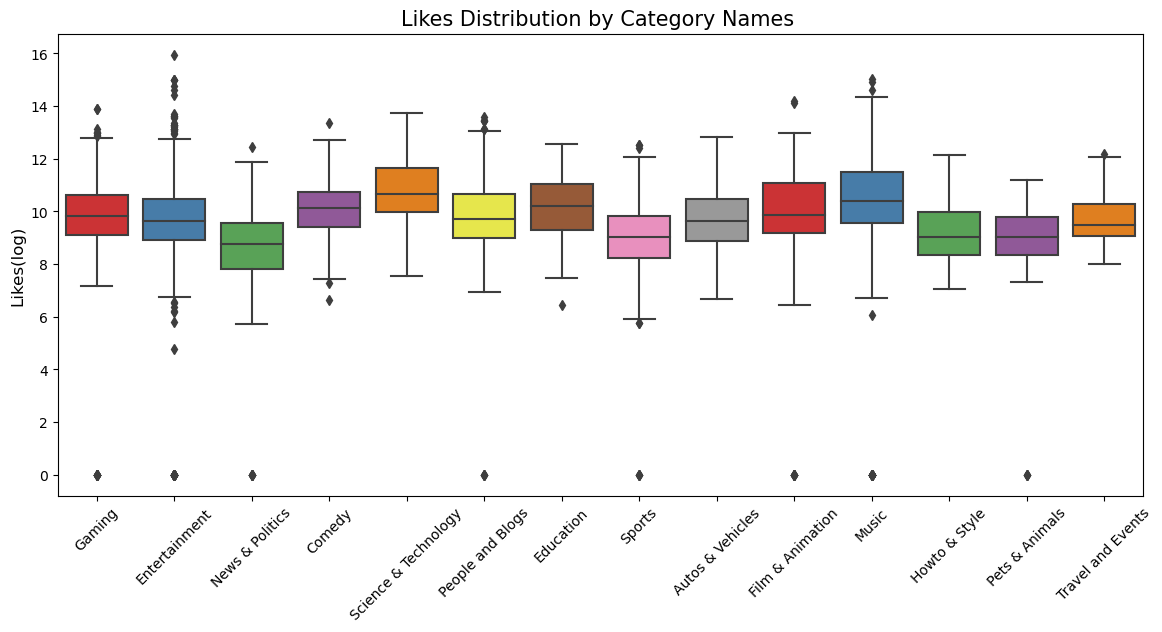

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribution by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

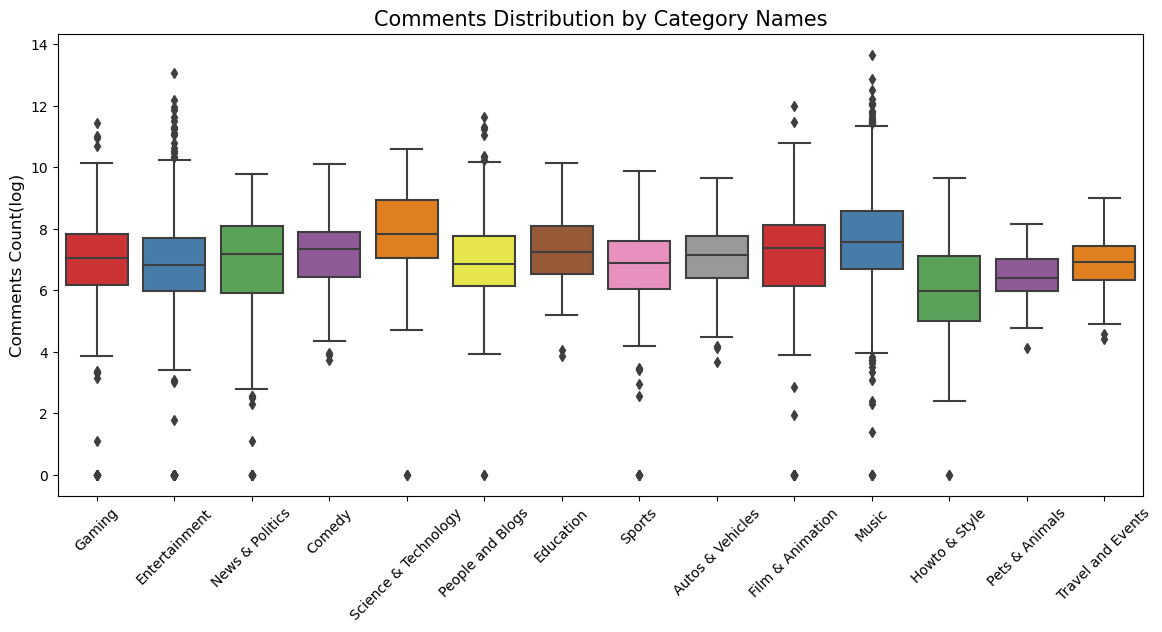

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribution by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

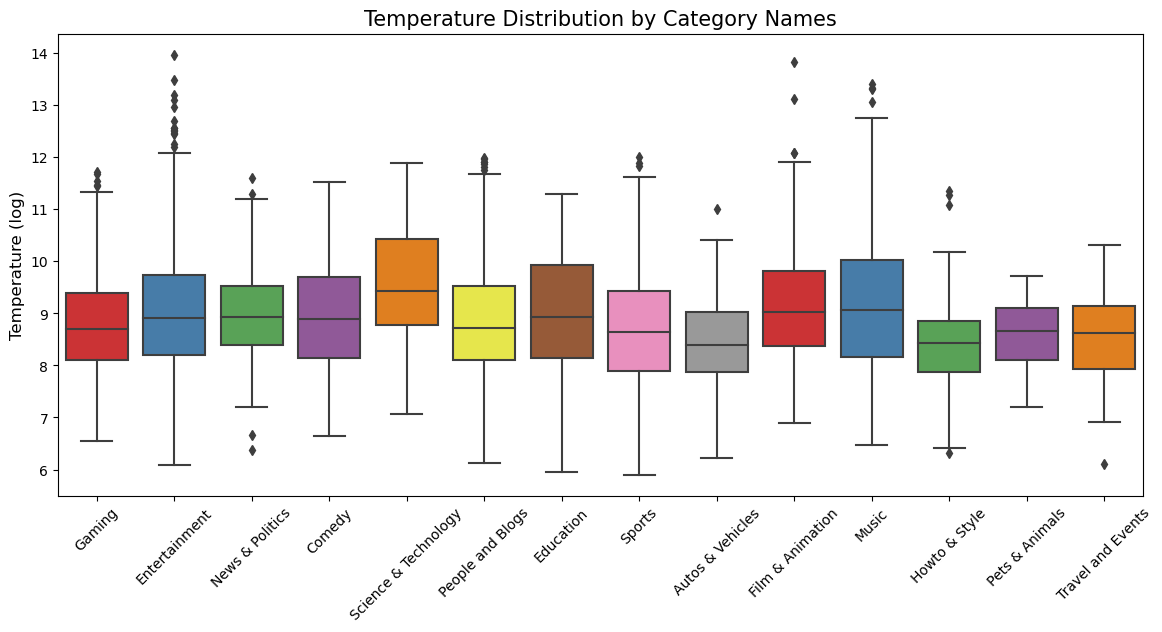

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='temperature_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Temperature Distribution by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Temperature (log)", fontsize=12)

plt.show()

Analysing the Correlation Matrix of the numerical variables

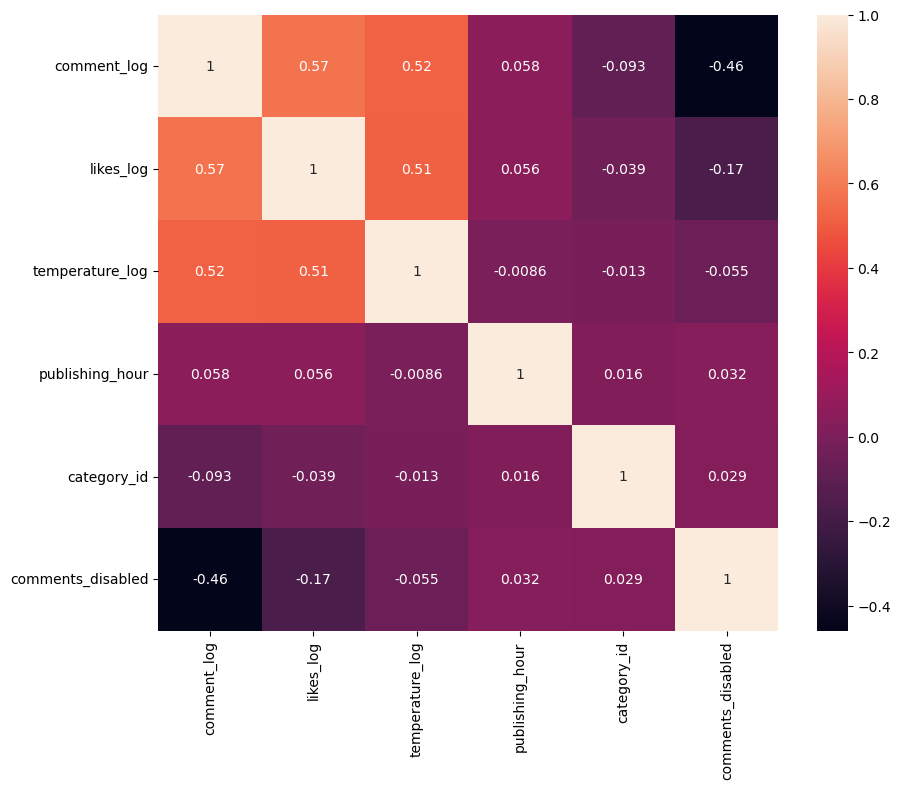

In [18]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_yout[['comment_log', 'likes_log', 'temperature_log', 'publishing_hour', 'category_id', 'comments_disabled']].corr(), annot=True)
plt.show()

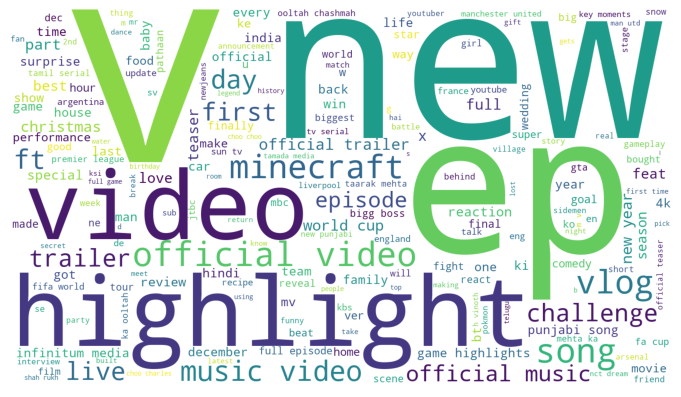

In [25]:
# create empty string to hold all video titles later
text = ''
printable = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n'

# filter all the titles to leave only printable characters
df_yout['title'] = df_yout['title'].apply(
    lambda x: ''.join(filter(lambda xi: xi in printable, x)))
# get each video title, break the words into tokens and add to 'text'
for x in df_yout.index:
    title = str(df_yout.loc[x, 'title'])

    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    text += ' '.join(tokens)+' '

# generate word cloud
cloud = WordCloud(
    width=1400, height=800, background_color='white', min_font_size=12).generate(text)
# plot the word cloud
plt.figure(figsize=(8, 14), facecolor=None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad=5)
plt.show()